In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder
import joblib


In [63]:
df = pd.read_csv("data_train_final.csv")
df.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoSeasonalActive,CompetitionIsActive,Sales,Customers
0,1,Friday,2015-07-31,Open,Daily Promo Active,Nothing,School Holiday Effect,Store Type C,Basic,Not Active,Active,5263,555
1,2,Friday,2015-07-31,Open,Daily Promo Active,Nothing,School Holiday Effect,Store Type A,Basic,Active,Active,6064,625
2,3,Friday,2015-07-31,Open,Daily Promo Active,Nothing,School Holiday Effect,Store Type A,Basic,Active,Active,8314,821
3,4,Friday,2015-07-31,Open,Daily Promo Active,Nothing,School Holiday Effect,Store Type C,Extended,Not Active,Active,13995,1498
4,5,Friday,2015-07-31,Open,Daily Promo Active,Nothing,School Holiday Effect,Store Type A,Basic,Not Active,Active,4822,559


In [3]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
PromoSeasonalActive    0
CompetitionIsActive    0
Sales                  0
Customers              0
dtype: int64

In [64]:
# pastikan kolom bertipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# pecah jadi kolom baru
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [7]:
print(df.shape)

(1017209, 16)


In [65]:
# Fitur yang digunakan untuk pelatihan model
X = df.drop(columns=["Sales", "Customers","Date"])
y = df["Sales"]

# Enkripsi fitur kategorik

In [66]:
# deteksi kolom kategorik
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# siapkan dictionary untuk menyimpan encoder (biar bisa inverse_transform nanti)
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

print("Kolom yang di-label encode:", list(cat_cols))
X.head()

Kolom yang di-label encode: ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'PromoSeasonalActive', 'CompetitionIsActive']


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoSeasonalActive,CompetitionIsActive,Year,Month,Day
0,1,0,1,0,2,1,2,0,1,0,2015,7,31
1,2,0,1,0,2,1,0,0,0,0,2015,7,31
2,3,0,1,0,2,1,0,0,0,0,2015,7,31
3,4,0,1,0,2,1,2,1,1,0,2015,7,31
4,5,0,1,0,2,1,0,0,1,0,2015,7,31


In [10]:
encoders

{'DayOfWeek': LabelEncoder(),
 'Open': LabelEncoder(),
 'Promo': LabelEncoder(),
 'StateHoliday': LabelEncoder(),
 'SchoolHoliday': LabelEncoder(),
 'StoreType': LabelEncoder(),
 'Assortment': LabelEncoder(),
 'PromoSeasonalActive': LabelEncoder(),
 'CompetitionIsActive': LabelEncoder()}

# Pembagian Data Latih dan Uji

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=123
)

print(f"shape dari data train: {X_train.shape}")
print(f"shape dari label train: {y_train.shape}")
print(f"shape dari data test: {X_test.shape}")
print(f"shape dari label test: {y_test.shape}")

shape dari data train: (813767, 13)
shape dari label train: (813767,)
shape dari data test: (203442, 13)
shape dari label test: (203442,)


In [68]:
# Fitur yang digunakan saat proses pelatihan model
print(f"Fitur-fitur yang terdapat pada data train ada {len(X_train.columns)} fitur diantaranya:\n\n{X_train.columns}")

Fitur-fitur yang terdapat pada data train ada 13 fitur diantaranya:

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'PromoSeasonalActive', 'CompetitionIsActive',
       'Year', 'Month', 'Day'],
      dtype='object')


=== Linear Regression ===
RMSE : 2593.1738
R2   : 0.5471

=== Random Forest Regressor ===
RMSE : 1134.6940
R2   : 0.9133


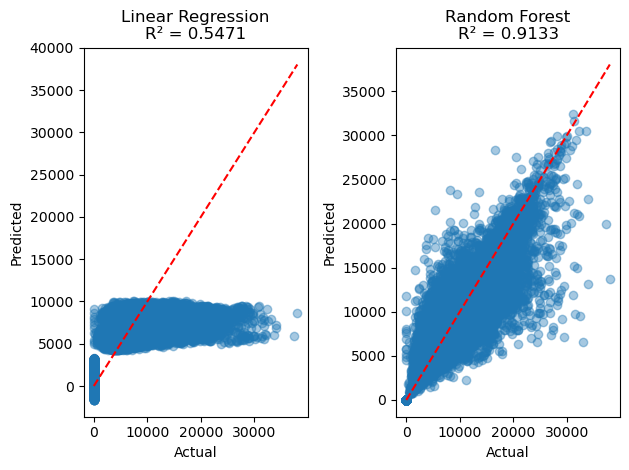

In [ ]:
# ===== Model =====
lr = LinearRegression()
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=2
)

# ===== Fit =====
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# ===== Predict =====
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# ===== Evaluasi =====
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Linear Regression ===")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R2   : {r2_lr:.4f}")

print("\n=== Random Forest Regressor ===")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R2   : {r2_rf:.4f}")

# ===== Diagram Perbandingan R2 =====
models = ['Linear Regression', 'Random Forest']
r2_values = [r2_lr, r2_rf]

# ===== Scatter Linear Regression =====
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')   # garis ideal
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Linear Regression\nR² = {r2_lr:.4f}")


# ===== Scatter Random Forest =====
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Random Forest\nR² = {r2_rf:.4f}")

plt.tight_layout()
plt.show()



In [10]:
def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(name)
    print(f"RMSE : {rmse:.2f}")
    print(f"R2   : {r2:.3f}")
    print("-" * 30)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regression")


Linear Regression
RMSE : 2593.17
R2   : 0.547
------------------------------
Random Forest Regression
RMSE : 1134.69
R2   : 0.913
------------------------------


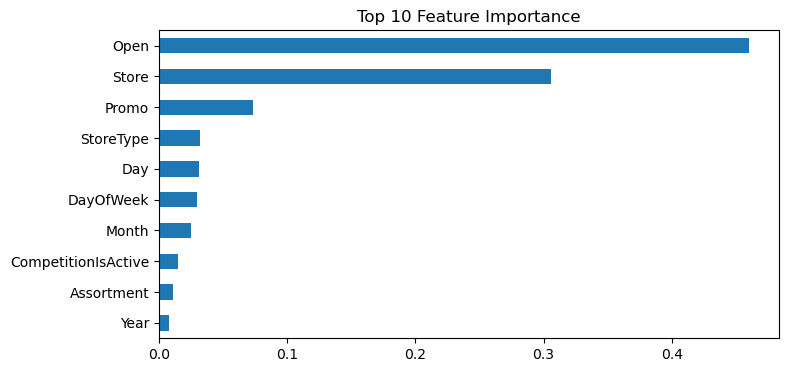

In [11]:
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10).plot(kind="barh", figsize=(8,4))
plt.title("Top 10 Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
joblib.dump(rf, "forecast_rossman_rf.pkl")

['forecast_rossman_rf.pkl']

# Proses Prediksi

In [ ]:
rf = joblib.load("forecast_rossman_rf.pkl")

In [13]:
df_test = pd.read_csv("data_test_final.csv")
df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoSeasonalActive,CompetitionIsActive
0,1,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type C,Basic,Not Active,Active
1,3,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Basic,Not Active,Active
2,7,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Extended,Not Active,Active
3,8,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Basic,Not Active,Active
4,9,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Extended,Not Active,Active


In [14]:
# pastikan kolom bertipe datetime
df_test['Date'] = pd.to_datetime(df_test['Date'])

# pecah jadi kolom baru
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day

In [16]:
X_test = df_test.drop(columns=('Date'))
for col in cat_cols:
    X_test[col] = encoders[col].transform(X_test[col].astype(str))

In [ ]:
len(X_test.columns)

13

In [ ]:
# # ======== PREDIKSI =========
y_pred_test = rf.predict(X_test)

# bulatkan sesuai aturan > 0.5 ke atas
y_pred_rounded = np.where(
    (y_pred_test % 1) > 0.5,
    np.ceil(y_pred_test),
    np.floor(y_pred_test)
)

df_test['Sales Prediction'] = y_pred_test
df_test['Sales Prediction rounded'] = y_pred_rounded.astype(int)
df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoSeasonalActive,CompetitionIsActive,Year,Month,Day,Sales Prediction,Sales Prediction rounded
0,1,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type C,Basic,Not Active,Active,2015,9,17,4403.93,4404
1,3,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Basic,Not Active,Active,2015,9,17,7689.32,7689
2,7,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Extended,Not Active,Active,2015,9,17,9544.03,9544
3,8,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Basic,Not Active,Active,2015,9,17,8173.63,8174
4,9,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Extended,Not Active,Active,2015,9,17,7899.73,7900


In [ ]:
df_test.to_csv('data_prediksi_rf.csv',index=False)

# Visualisasi

In [32]:
df_predict = pd.read_csv('data_prediksi_rf.csv')
df_train = pd.read_csv('data_train_final.csv')
df_predict.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoSeasonalActive,CompetitionIsActive,Year,Month,Day,Sales Prediction,Sales Prediction rounded
0,1,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type C,Basic,Not Active,Active,2015,9,17,4403.93,4404
1,3,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Basic,Not Active,Active,2015,9,17,7689.32,7689
2,7,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Extended,Not Active,Active,2015,9,17,9544.03,9544
3,8,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Basic,Not Active,Active,2015,9,17,8173.63,8174
4,9,Thursday,2015-09-17,Open,Daily Promo Active,Nothing,No School Holiday Effect,Store Type A,Extended,Not Active,Active,2015,9,17,7899.73,7900


In [35]:
## Rentang tanggal dataset latih
df_train["Date"].min(), df_train["Date"].max()
print('Rentang data train:')
print("Tanggal awal :", df_train["Date"].min())
print("Tanggal akhir:", df_train["Date"].max())

## Rentang tanggal dataset latih
df_predict["Date"].min(), df_predict["Date"].max()
print('\nRentang data test:')
print("Tanggal awal :", df_predict["Date"].min())
print("Tanggal akhir:", df_predict["Date"].max())

Rentang data train:
Tanggal awal : 2013-01-01
Tanggal akhir: 2015-07-31

Rentang data test:
Tanggal awal : 2015-08-01
Tanggal akhir: 2015-09-17


In [41]:
print(df_train.Date.value_counts())
# print('\n',df_predict.Date.value_counts())

Date
2013-01-02    1115
2015-07-31    1115
2015-07-30    1115
2015-07-29    1115
2015-07-28    1115
              ... 
2014-12-28     935
2014-12-26     935
2014-12-25     935
2014-12-24     935
2014-12-23     935
Name: count, Length: 942, dtype: int64


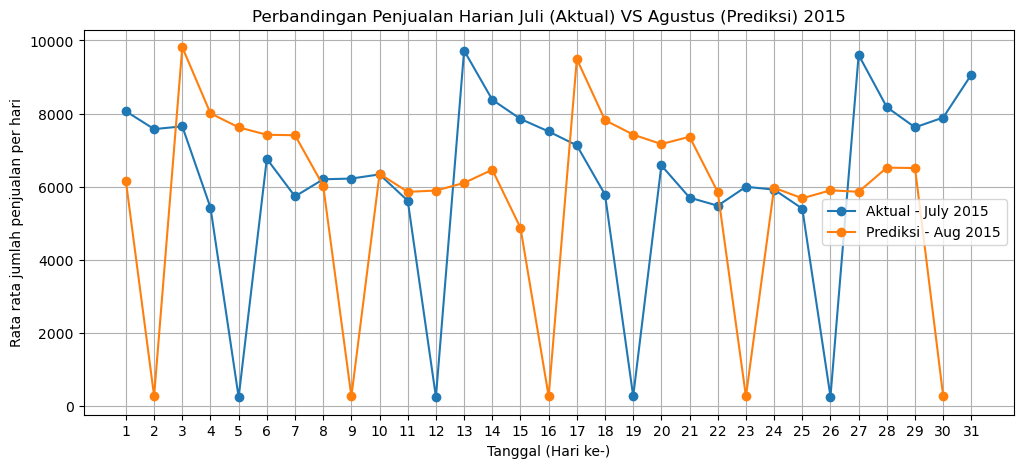

In [ ]:
# pastikan tipe datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_predict['Date'] = pd.to_datetime(df_predict['Date'])

# ===== Filter 30 hari =====
train_july = df_train[
    (df_train['Date'] >= '2015-07-01') &
    (df_train['Date'] <= '2015-07-31')
]

predict_aug = df_predict[
    (df_predict['Date'] >= '2015-08-01') &
    (df_predict['Date'] <= '2015-08-30')  # 30 hari pertama
]

# tambah kolom hari
train_july_daily = train_july.groupby('Date')['Sales'].mean().reset_index()
predict_aug_daily = predict_aug.groupby('Date')['Sales Prediction rounded'].mean().reset_index()

train_july_daily['Day'] = train_july_daily['Date'].dt.day
predict_aug_daily['Day'] = predict_aug_daily['Date'].dt.day

plt.figure(figsize=(12,5))

plt.plot(
    train_july_daily['Day'], 
    train_july_daily['Sales'], 
    label="Aktual - July 2015",
    marker='o',           # <-- titik
    linestyle='-',
    markersize=6
)

plt.plot(
    predict_aug_daily['Day'], 
    predict_aug_daily['Sales Prediction rounded'], 
    label="Prediksi - Aug 2015",
    marker='o',           # <-- titik
    linestyle='-',
    markersize=6
)

plt.title("Perbandingan Penjualan Harian Juli (Aktual) VS Agustus (Prediksi) 2015")
plt.xlabel("Tanggal (Hari ke-)")
plt.ylabel("Rata rata jumlah penjualan per hari")
plt.xticks(range(1,32))
plt.grid(True)
plt.legend()
plt.legend(loc='right')
plt.show()





C:\Users\Dhani\AppData\Local\Temp\ipykernel_13628\1570255199.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Dhani\AppData\Local\Temp\ipykernel_13628\1570255199.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Dhani\AppData\Local\Temp\ipykernel_13628\1570255199.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


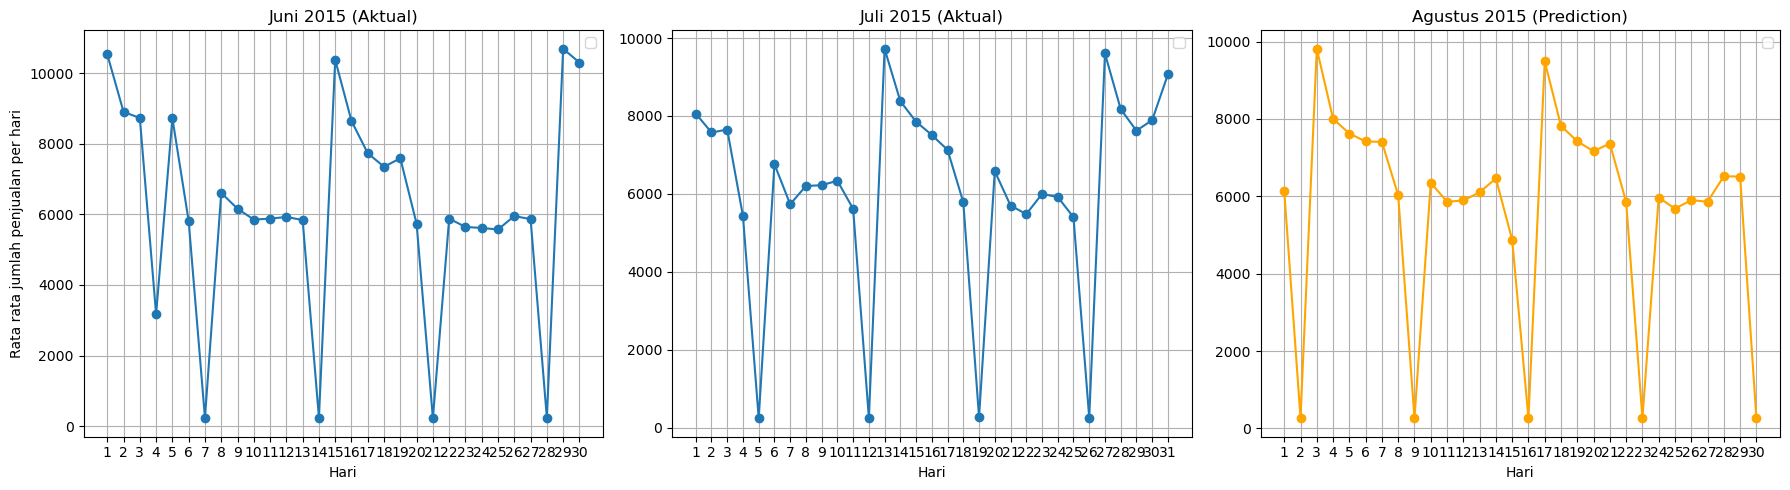

In [ ]:
# pastikan datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_predict['Date'] = pd.to_datetime(df_predict['Date'])

# ========== FILTER ==========
june = df_train[
    (df_train['Date'] >= '2015-06-01') &
    (df_train['Date'] <= '2015-06-30')
]

july = df_train[
    (df_train['Date'] >= '2015-07-01') &
    (df_train['Date'] <= '2015-07-31')
]

aug = df_predict[
    (df_predict['Date'] >= '2015-08-01') &
    (df_predict['Date'] <= '2015-08-30')
]

# jika multi-store → agregasi harian
june_daily  = june.groupby('Date')['Sales'].mean().reset_index()
july_daily  = july.groupby('Date')['Sales'].mean().reset_index()
aug_daily   = aug.groupby('Date')['Sales Prediction rounded'].mean().reset_index()

# tambahkan kolom hari
june_daily['Day'] = june_daily['Date'].dt.day
july_daily['Day'] = july_daily['Date'].dt.day
aug_daily['Day']  = aug_daily['Date'].dt.day

# ========== VISUALISASI ==========
plt.figure(figsize=(18,5))

# ---- JUNI ----
plt.subplot(1,3,1)
plt.plot(june_daily['Day'], june_daily['Sales'],
         marker='o', linestyle='-')
plt.title("Juni 2015 (Aktual)")
plt.xlabel("Hari")
plt.ylabel("Rata rata jumlah penjualan per hari")
plt.xticks(range(1,31))
plt.grid(True)
plt.legend()

# ---- JULI ----
plt.subplot(1,3,2)
plt.plot(july_daily['Day'], july_daily['Sales'],
         marker='o', linestyle='-')
plt.title("Juli 2015 (Aktual)")
plt.xlabel("Hari")
plt.xticks(range(1,32))
plt.grid(True)
plt.legend()

# ---- AGUSTUS ----
plt.subplot(1,3,3)
plt.plot(aug_daily['Day'], aug_daily['Sales Prediction rounded'],
         marker='o', linestyle='-', color='orange')
plt.title("Agustus 2015 (Prediction)")
plt.xlabel("Hari")
plt.xticks(range(1,31))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

